# Import

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import cv2.aruco as aruco
import copy

# Parameters

In [2]:
def sharpen_image(image):
    # Create a sharpening kernel
    kernel = np.array([[-1, -1, -1],
                       [-1, 9, -1],
                       [-1, -1, -1]])

    # Apply the kernel to the image using convolution
    sharpened_image = cv2.filter2D(image, -1, kernel)

    return sharpened_image

In [3]:
ARUCO_DICT = aruco.DICT_4X4_50
SQUARES_VERTICALLY = 9
SQUARES_HORIZONTALLY = 6
SQUARE_LENGTH = 0.05
MARKER_LENGTH = 0.03

dictionary = aruco.getPredefinedDictionary(ARUCO_DICT)
parameters = aruco.DetectorParameters()
parameters.polygonalApproxAccuracyRate = 0.15
parameters.perspectiveRemoveIgnoredMarginPerCell = 0.25
# parameters.cornerRefinementMethod = aruco.CORNER_REFINE_SUBPIX
charuco_board = aruco.CharucoBoard((SQUARES_VERTICALLY, SQUARES_HORIZONTALLY), SQUARE_LENGTH, MARKER_LENGTH, dictionary)

# Left Image

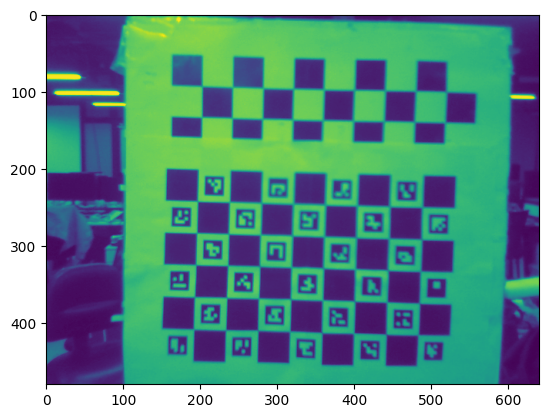

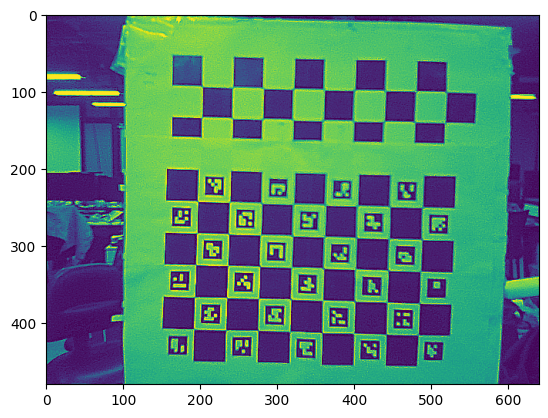

In [6]:
left_img = cv2.imread('Left Camera_screenshot_23.01.2024_07_F1.png')
left_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
left_sharp = sharpen_image(copy.deepcopy(left_gray))
plt.imshow(left_gray)
plt.show()
plt.imshow(left_sharp)

25


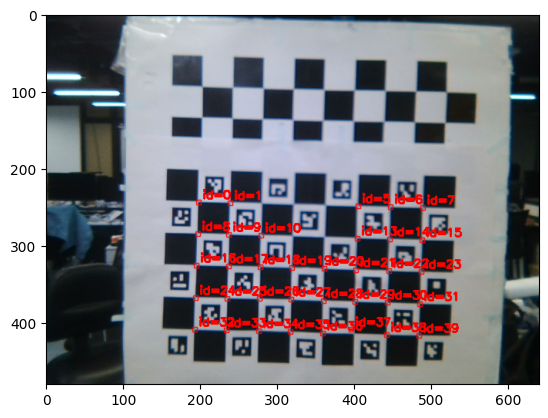

In [7]:
corners, ids, rejected = aruco.detectMarkers(left_sharp, dictionary, parameters=parameters)

if len(corners) > 0:
    charuco_retval, charuco_corners, charuco_ids = aruco.interpolateCornersCharuco(corners, ids, left_sharp, charuco_board)
    
    if charuco_retval:
        left_disp = aruco.drawDetectedCornersCharuco(copy.deepcopy(left_img), charuco_corners, charuco_ids)
    
plt.imshow(left_disp)
print(len(ids))

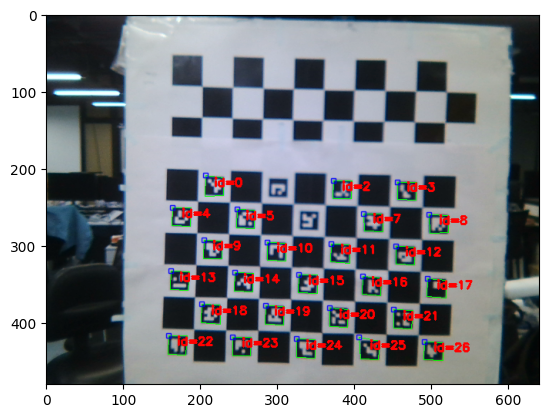

In [8]:
left_frame = cv2.aruco.drawDetectedMarkers(image=copy.deepcopy(left_img), corners=corners, ids=ids, borderColor=(0, 255, 0))
plt.imshow(left_frame)

# Right Image

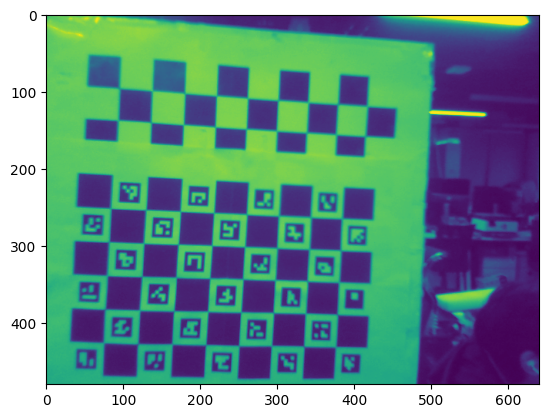

In [10]:
right_img = cv2.imread('Right Camera_screenshot_23.01.2024_07_F1.png')
right_gray = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)
plt.imshow(right_gray)

27


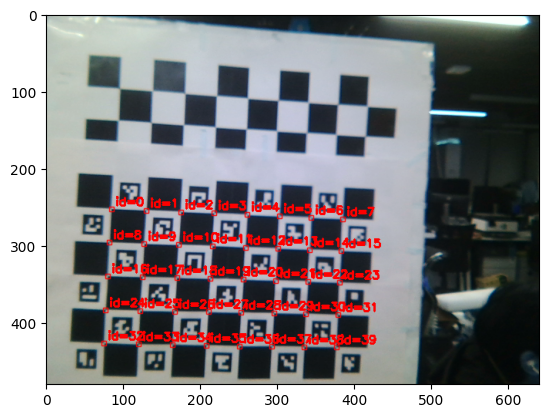

In [11]:
corners, ids, rejected = aruco.detectMarkers(right_gray, dictionary, parameters=parameters)

if len(corners) > 0:
    charuco_retval, charuco_corners, charuco_ids = aruco.interpolateCornersCharuco(corners, ids, right_gray, charuco_board)
    
    if charuco_retval:
        right_disp = aruco.drawDetectedCornersCharuco(copy.deepcopy(right_img), charuco_corners, charuco_ids)
    
plt.imshow(right_disp)
print(len(ids))

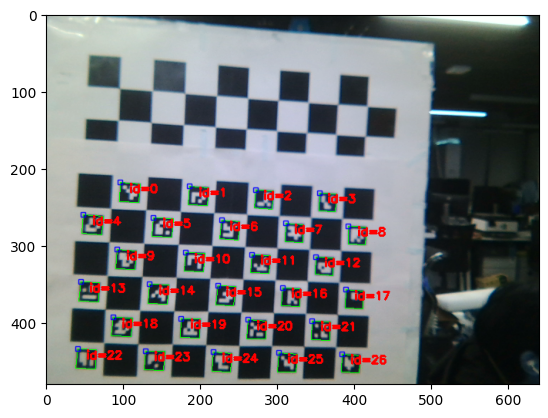

In [12]:
right_frame = cv2.aruco.drawDetectedMarkers(image=right_img, corners=corners, ids=ids, borderColor=(0, 255, 0))
plt.imshow(right_frame)